<a href="https://colab.research.google.com/github/DK-77/CE059_Dhruv_Kathrotiya/blob/main/Lab4/Lab4_Task1_CE059.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CE059 - Dataset 2, split 90-10, Label Encoding


In [8]:
import sklearn
from sklearn import preprocessing
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/ML/Lab3/PracticeDataSets/Dataset2.csv')
print('\n Data \n', data)



 Data 
    Outlook Temp Wind Humidity Class
0        R    H    F   Normal     N
1        R    H    T     High     N
2        O    H    F   Normal     Y
3        S    M    F   Normal     N
4        S    M    F   Normal     Y
5        S    M    T      Low     Y
6        O    C    T   Normal     Y
7        R    C    F   Normal     Y
8        R    C    F      Low     Y
9        S    M    F     High     Y
10       R    M    T     High     Y
11       O    M    T      Low     Y
12       O    H    F   Normal     Y
13       S    M    T   Normal     N


In [4]:
Outlook,Temp,Wind,Humidity,Class = [],[],[],[],[]

Outlook = data.iloc[:,0].values
print("\n\n Outlook \n\n",Outlook)

Temp = data.iloc[:,1].values
print("\n\n Temp \n\n",Temp)

Wind = data.iloc[:,2].values
print("\n\n Wind \n\n",Wind)

Humidity = data.iloc[:,3].values
print("\n Humidity \n\n",Humidity)

Class = data.iloc[:,4].values
print("\n Class \n\n",Class)




 Outlook 

 ['R' 'R' 'O' 'S' 'S' 'S' 'O' 'R' 'R' 'S' 'R' 'O' 'O' 'S']


 Temp 

 ['H' 'H' 'H' 'M' 'M' 'M' 'C' 'C' 'C' 'M' 'M' 'M' 'H' 'M']


 Wind 

 ['F' 'T' 'F' 'F' 'F' 'T' 'T' 'F' 'F' 'F' 'T' 'T' 'F' 'T']

 Humidity 

 ['Normal' 'High' 'Normal' 'Normal' 'Normal' 'Low' 'Normal' 'Normal' 'Low'
 'High' 'High' 'Low' 'Normal' 'Normal']

 Class 

 ['N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N']


In [5]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
outlook_encoded=le.fit_transform(Outlook)
print("Outlook:" ,outlook_encoded)

temp_encoded=le.fit_transform(Temp)
print("\n\nTemp:" ,temp_encoded)

wind_encoded=le.fit_transform(Wind)
print("\n\nWind:" ,wind_encoded)

humidity_encoded=le.fit_transform(Humidity)
print("\n\nHumidity:" ,humidity_encoded)

class_encoded=le.fit_transform(Class)
print("\n\nClass:" ,class_encoded)

Outlook: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]


Temp: [1 1 1 2 2 2 0 0 0 2 2 2 1 2]


Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]


Humidity: [2 0 2 2 2 1 2 2 1 0 0 1 2 2]


Class: [0 0 1 0 1 1 1 1 1 1 1 1 1 0]


In [6]:
#Combinig all features into single listof tuples
features=tuple(zip(outlook_encoded,temp_encoded,wind_encoded,humidity_encoded))
print("Features:",features)
targets = class_encoded
print("\n\nTargets:",targets)

Features: ((1, 1, 0, 2), (1, 1, 1, 0), (0, 1, 0, 2), (2, 2, 0, 2), (2, 2, 0, 2), (2, 2, 1, 1), (0, 0, 1, 2), (1, 0, 0, 2), (1, 0, 0, 1), (2, 2, 0, 0), (1, 2, 1, 0), (0, 2, 1, 1), (0, 1, 0, 2), (2, 2, 1, 2))


Targets: [0 0 1 0 1 1 1 1 1 1 1 1 1 0]


In [7]:
#import the necessary module
from sklearn.model_selection import train_test_split

#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(features,
                        targets, test_size = 0.10, random_state = 59)

In [9]:
# Create a decisionTreeCalssifier object

from sklearn import metrics

dc = DecisionTreeClassifier(criterion = "entropy")
dc.fit(data_train, target_train)
target_pred = dc.predict(data_test)

In [10]:
# Accuracy
print("Accuracy: ", metrics.accuracy_score(target_test, target_pred))

Accuracy:  1.0


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_test, target_pred)

array([[2]])

In [17]:
import tkinter

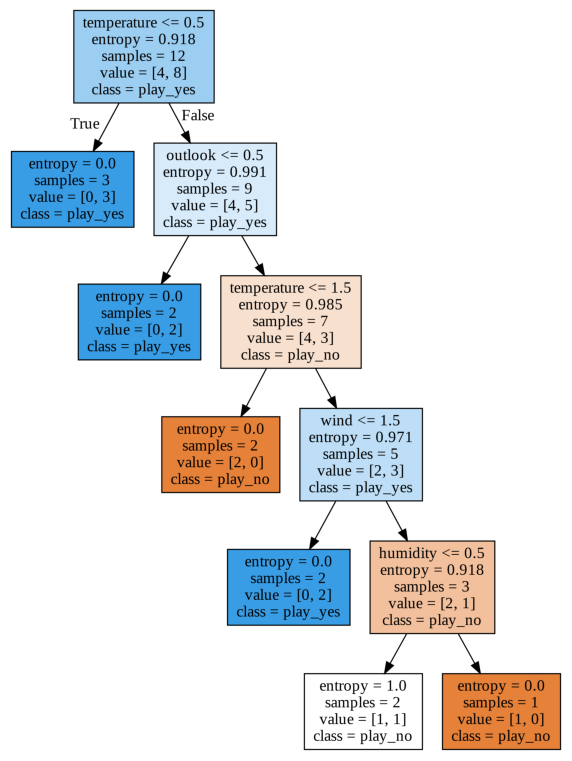

In [21]:
from sklearn.tree import export_graphviz
export_graphviz(dc, out_file='tree_entropy.dot',
               feature_names=['outlook','temperature','humidity','wind'],
               class_names=['play_no','play_yes'], 
               filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 15))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();